In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()


In [ ]:
print("Train_X Data: ", x_train.shape)
print("Test_X  Data: ",x_test.shape)
print("Train_Y Data: ",y_train.shape)
print("Test_Y Data: ",y_test.shape)

Train_X Data:  (60000, 28, 28)
Test_X  Data:  (10000, 28, 28)
Train_Y Data:  (60000,)
Test_Y Data:  (10000,)


In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

28613 th 


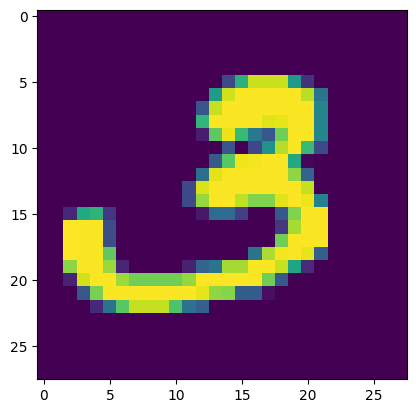

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
input_num = np.random.randint(1,60000)
print(input_num, "th ")
plt.imshow(x_train[input_num])

In [ ]:
x_train = x_train/255
x_test= x_test/255


In [ ]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam') #i'd rather not prefer to one-hot encode by categorical_crossentropy

In [ ]:
history = model.fit(x_train, y_train, epochs = 10, validation_split = 0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 1.2329 - val_loss: 0.3519
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.3398 - val_loss: 0.2672
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.2665 - val_loss: 0.2235
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.2221 - val_loss: 0.1937
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.1922 - val_loss: 0.1718
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.1677 - val_loss: 0.1614
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.1515 - val_loss: 0.1423
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.1319 - val_loss: 0.1366
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.1250 - val_loss: 0.1259
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.1091 - val_loss: 0.1193


In [ ]:
y_probab = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
y_pred = y_probab.argmax(axis = 1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9633

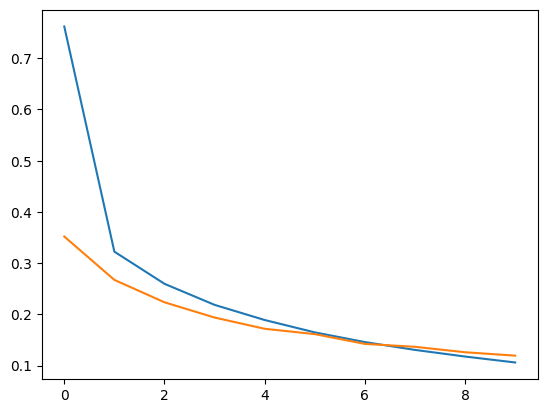

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


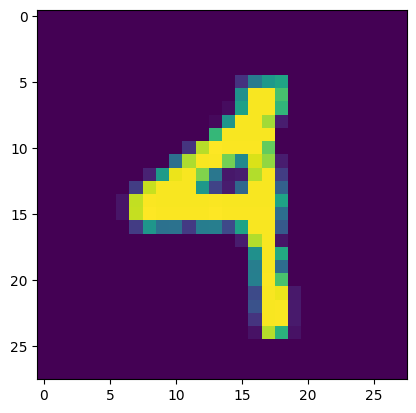

In [ ]:
check = np.random.randint(1,10000)
plt.imshow(x_test[check])

In [ ]:
pred_num = model.predict(x_test[check].reshape(1,28,28)).argmax(axis=1)
print("Model's Prediction: ",pred_num[0])
print("Actual Value: ",y_test[check])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
Model's Prediction:  4
Actual Value:  4
